In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F# Has the RELU activation function

import matplotlib.pyplot as plt # Draws graphs
import seaborn as sns #Draws better looking graphs

In [ ]:
# Creation of my neural network class

class myNN(nn.Module):

    def __init__(self): #Constructor
        super().__init__() #Call parent class constructor

        #Initialize weights and biases of the network

        # Weight and bias to the top node
        self.w1 = torch.tensor(1.43)
        self.b1 = torch.tensor(-0.61)
        #Weight and bias to the bottom node
        self.w2 = torch.tensor(2.63)
        self.b2 = torch.tensor(-0.27)
        # Weight and bias to the output node
        self.w3 = torch.tensor(-3.89)
        self.w4 = torch.tensor(1.35)

    def forward(self, input_values):

        top_x_axis_values = (input_values * self.w1) + self.b1
        bottom_x_axis_values = (input_values * self.w2) + self.b2

        top_y_axis_values = F.relu(top_x_axis_values)
        bottom_y_axis_values = F.relu(bottom_x_axis_values)

        output_values = (top_y_axis_values * self.w3) + (bottom_y_axis_values * self.w4)

        return output_values


In [ ]:
# Create object of my neural network class
model = myNN()

In [6]:
# Initialization of tensor that will hold my input values
doses = torch.tensor([0.0, 0.5, 1.0])

#Pass the doses to the model
model(doses)

tensor([ 0.0000,  1.0023, -0.0038])

In [7]:
# Round to two decimal places
torch.round(model(doses), decimals = 2)

tensor([0., 1., -0.])

In [8]:
# Create doses between 0 and 1 including 0 and 1
input_doses = torch.linspace(start = 0, end = 1, steps = 11)

input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [10]:
top_x_axis_values = (model.w1 * input_doses) + model.b1
top_x_axis_values 

tensor([-0.6100, -0.4670, -0.3240, -0.1810, -0.0380,  0.1050,  0.2480,  0.3910,
         0.5340,  0.6770,  0.8200])

In [11]:
top_y_axis_values = F.relu(top_x_axis_values)
top_y_axis_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1050, 0.2480, 0.3910, 0.5340,
        0.6770, 0.8200])

Text(0.5, 0, 'Dose')

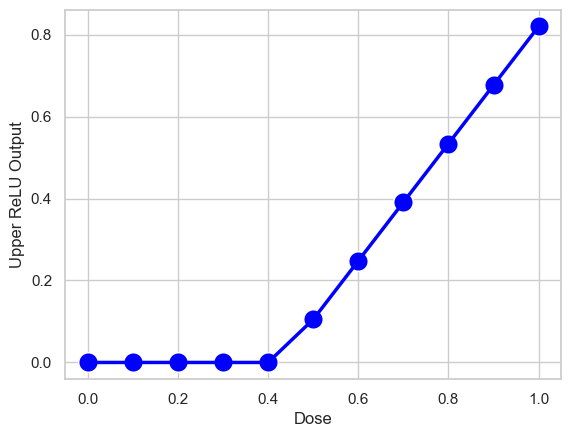

In [13]:
# Draw a graph of input doses and the y axis output from the top Relu

#Set style
sns.set(style = 'whitegrid')

#First draw the individual points
sns.scatterplot(x = input_doses, y = top_y_axis_values, color = 'blue', s = 200)

#Connect the points with a line 
sns.lineplot(x = input_doses, y = top_y_axis_values, color = 'blue', linewidth = 2.5)

plt.ylabel('Upper ReLU Output')
plt.xlabel('Dose')

Text(0, 0.5, 'Lower ReLU Output')

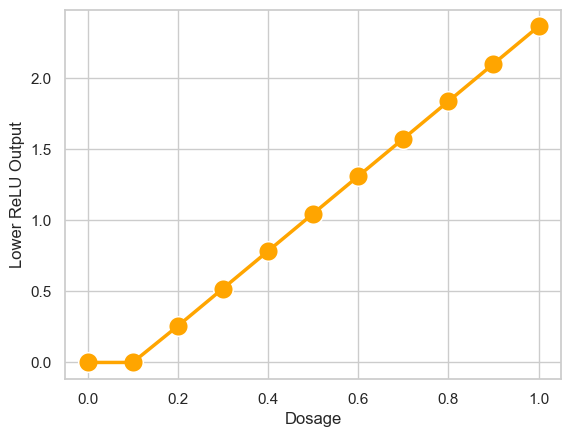

In [18]:
bottom_x_axis_values = (input_doses * model.w2) + model.b2
bottom_y_axis_values = F.relu(bottom_x_axis_values)

# First draw the individual points
sns.scatterplot(x = input_doses, y = bottom_y_axis_values, color = 'orange', s = 200)

#Draw a line throw the points
sns.lineplot(x = input_doses, y = bottom_y_axis_values, color = 'orange', linewidth = 2.5)

plt.xlabel('Dosage')
plt.ylabel('Lower ReLU Output')

Text(0, 0.5, 'ReLU Outputs')

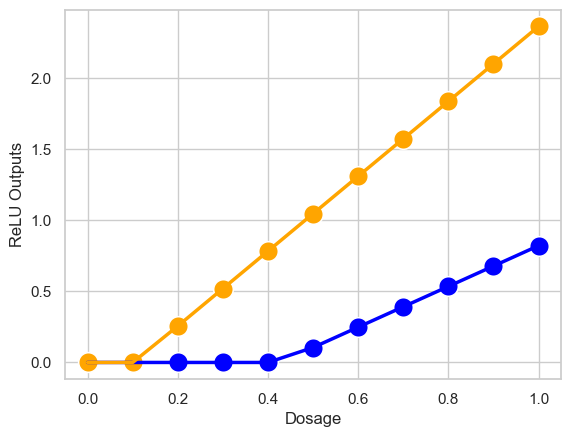

In [27]:
# Draw both plots on the same graph

# First draw the individual points
sns.scatterplot(x = input_doses, y = top_y_axis_values, color = 'blue', s = 200)

# Connect the points with a line 
sns.lineplot(x = input_doses, y = top_y_axis_values, color = 'blue', linewidth = 2.5)

plt.ylabel('Upper ReLU Output')
plt.xlabel('Dose')

# First draw the individual points
sns.scatterplot(x = input_doses, y = bottom_y_axis_values, color = 'orange', s = 200)

# Draw a line throw the points
sns.lineplot(x = input_doses, y = bottom_y_axis_values, color = 'orange', linewidth = 2.5)

plt.xlabel('Dosage')
plt.ylabel('ReLU Outputs')

In [21]:
final_top_y_axis_values = top_y_axis_values * model.w3
final_top_y_axis_values

tensor([-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.4084, -0.9647, -1.5210,
        -2.0773, -2.6335, -3.1898])

In [22]:
final_bottom_y_axis_values = bottom_y_axis_values * model.w4
final_bottom_y_axis_values

tensor([0.0000, 0.0000, 0.3456, 0.7007, 1.0557, 1.4108, 1.7658, 2.1209, 2.4759,
        2.8310, 3.1860])

Text(0, 0.5, 'Final Bent Shapes for Top and Bottom')

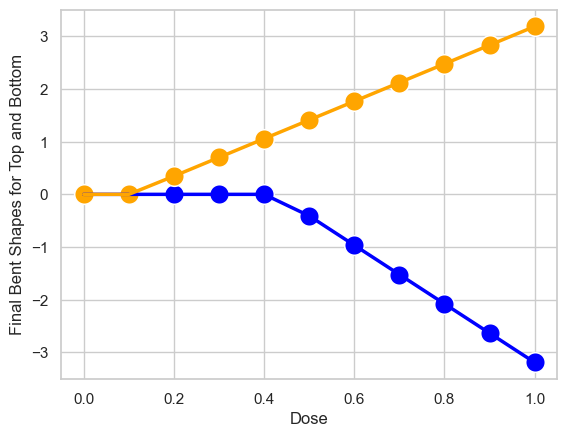

In [28]:
# First draw the individual points
sns.scatterplot(x = input_doses, y = final_top_y_axis_values, color = 'blue', s = 200)

# Connect the points with a line 
sns.lineplot(x = input_doses, y = final_top_y_axis_values, color = 'blue', linewidth = 2.5)

plt.ylabel('Upper ReLU Output')
plt.xlabel('Dose')

# First draw the individual points
sns.scatterplot(x = input_doses, y = final_bottom_y_axis_values, color = 'orange', s = 200)

# Draw a line throw the points
sns.lineplot(x = input_doses, y = final_bottom_y_axis_values, color = 'orange', linewidth = 2.5)

plt.xlabel('Dose')
plt.ylabel('Final Bent Shapes for Top and Bottom')

In [24]:
final_bent_shape = final_top_y_axis_values + final_bottom_y_axis_values
final_bent_shape

tensor([ 0.0000,  0.0000,  0.3456,  0.7007,  1.0557,  1.0023,  0.8011,  0.5999,
         0.3986,  0.1974, -0.0038])

Text(0, 0.5, 'Final Bent Shape')

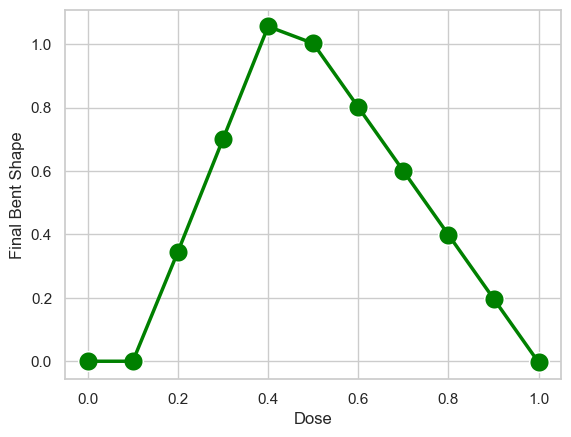

In [29]:
# First draw the individual points
sns.scatterplot(x = input_doses, y = final_bent_shape, color = 'green', s = 200)

# Draw a line throw the points
sns.lineplot(x = input_doses, y = final_bent_shape, color = 'green', linewidth = 2.5)

plt.xlabel('Dose')
plt.ylabel('Final Bent Shape')

<Axes: xlabel='Dose', ylabel='Effectiveness'>

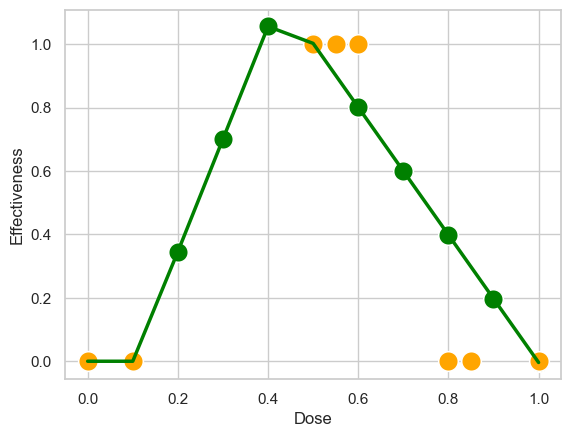

In [35]:
# First draw the individual points
sns.scatterplot(x = input_doses, y = final_bent_shape, color = 'green', s = 200)

# Draw a line throw the points
sns.lineplot(x = input_doses, y = final_bent_shape, color = 'green', linewidth = 2.5)

plt.xlabel('Dose')
plt.ylabel('Effectiveness')

# Draw the original doses to see how they fit to the data.
dummy_doses = [0.0, 0.1, 0.5, 0.55, 0.6, 0.8, 0.85, 1.0]
dummy_effectiveness = [0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
sns.scatterplot(x = dummy_doses, y = dummy_effectiveness, color = 'orange', s = 200)